In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [132]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1pJm_FyMxJGoeSHRrBhqj2NRvnwgzasoI'
downloaded = drive.CreateFile({'id': file_id})

output_file = 'IrishWords.csv'

downloaded.GetContentFile(output_file,mimetype='text/csv')

!pip install -q xlrd

import pandas as pd
df = pd.read_csv(output_file)

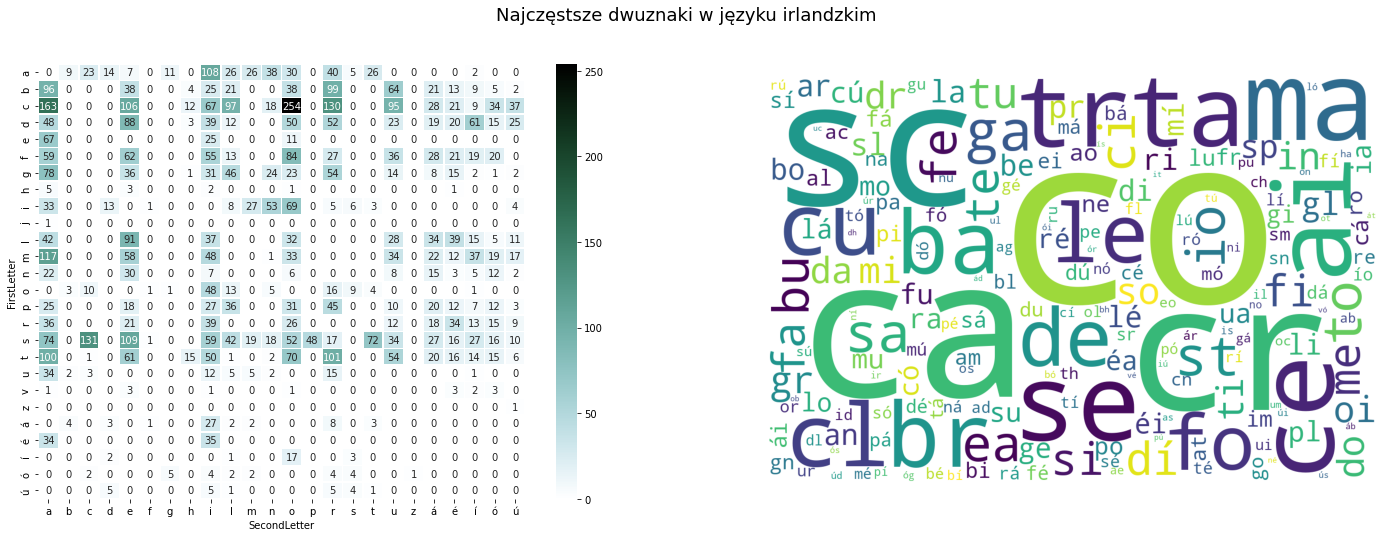

In [136]:
from re import L
dictionary = {}

for i in range (len(df)):
  ch2 = df['Word'][i][0:2]
  ch2 = ch2.lower().strip()
  if len(ch2) > 1:
    if ch2 in dictionary:
      dictionary[ch2] += 1
    else:
      dictionary[ch2] = 1

letters1 = []
letters2 = []
for ch2 in dictionary.keys():
  letters1.append(ch2[0])
  letters2.append(ch2[1])

for k in letters1:
  for l in letters2:
    ch2 = k + l
    if not ch2 in dictionary:
      dictionary[ch2] = 0

letters1 = []
letters2 = []
counts = []
for ch2 in dictionary.keys():
  letters1.append(ch2[0])
  letters2.append(ch2[1])
  counts.append(dictionary[ch2])


data = {}
data['FirstLetter'] = letters1
data['SecondLetter'] = letters2
data['Count'] = counts

stat = pd.DataFrame(data)

words = stat.pivot('FirstLetter','SecondLetter','Count')

fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

cmap = sns.cubehelix_palette(start=2, rot=0.2, light=1, dark=0, as_cmap=True)
sns.heatmap(words, ax=ax1, annot = True, fmt = "d", linewidths = 0.5, cmap = cmap)

wordcloud = WordCloud(width = 1200, height = 800, background_color= 'white', min_font_size= 10).generate_from_frequencies(dictionary)
ax2.imshow(wordcloud)
ax2.axis("off")

plt.suptitle("Najczęstsze dwuznaki w języku irlandzkim", fontsize = 18)
plt.show()

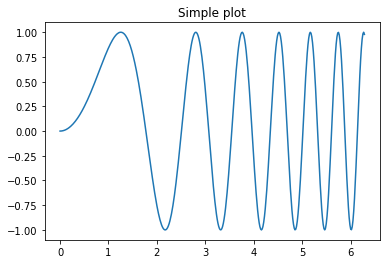

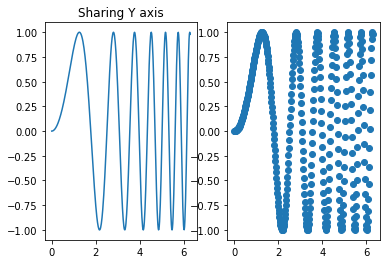

In [64]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

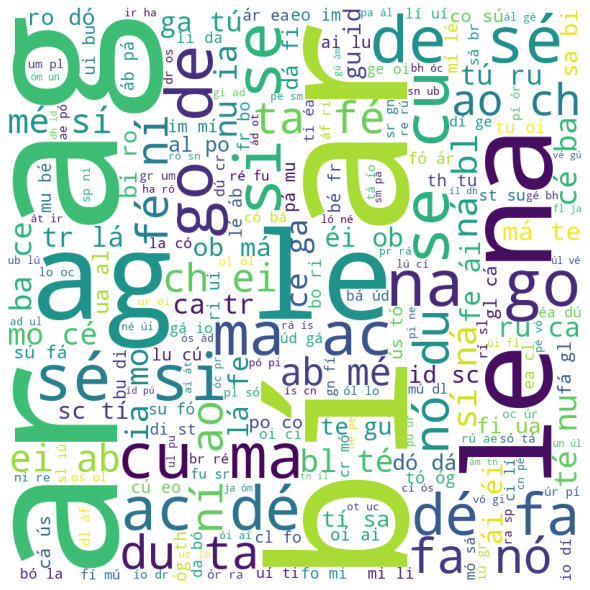

In [45]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from re import L

df = pd.read_csv(output_file, encoding = 'utf-8')

comment_words = ''
stopwords = set(STOPWORDS)
dictionary = {}

for i in range (len(df)):
  ch2 = df['Word'][i][0:2]
  ch2 = ch2.lower().strip()
  if len(ch2) > 1:
    if ch2 in dictionary:
      dictionary[ch2] += 1
    else:
      dictionary[ch2] = 1


  comment_words += " ".join(dictionary) + " "

wordcloud = WordCloud(width = 800, height = 800, background_color= 'white', stopwords = stopwords, min_font_size= 10).generate(comment_words)

plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [42]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from re import L

df = pd.read_csv(output_file, encoding = 'utf-8')

comment_words = ''
stopwords = set(STOPWORDS)
dictionary = {}

for i in range (len(df)):
  ch2 = df['Word'][i][0:2]
  ch2 = ch2.lower().strip()
  if len(ch2) > 1:
    if ch2 in dictionary:
      dictionary[ch2] += 1
    else:
      dictionary[ch2] = 1

letters1 = []
letters2 = []
counts = []
for ch2 in dictionary.keys():
  letters1.append(ch2[0])
  letters2.append(ch2[1])
  counts.append(dictionary[ch2])      


  comment_words += " ".join(dictionary) + " "

wordcloud = WordCloud(width = 800, height = 800, background_color= 'white', stopwords = stopwords, min_font_size= 10).generate_from_frequencies(comment_words, counts)
ax2 = plt.figure(figsize = (12,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

AttributeError: ignored

Text(0.5, 1.0, 'Najczęstsze dwuznaki w języku irlandzkim')

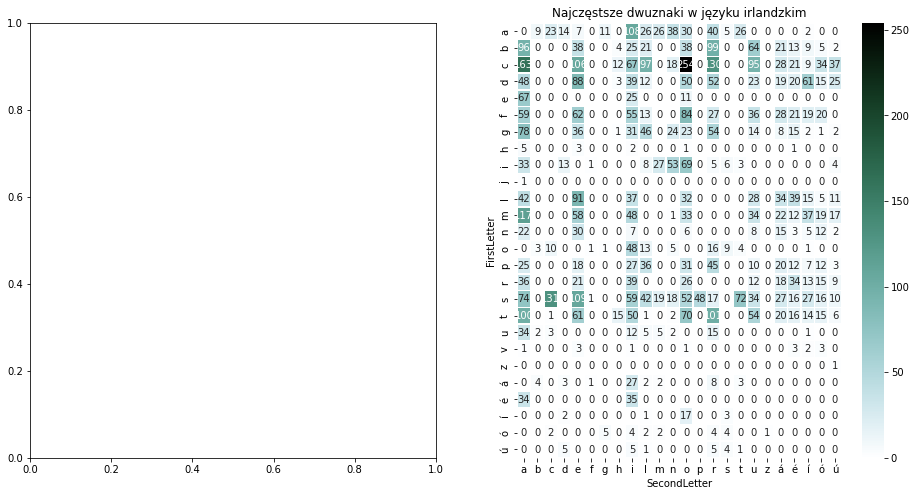

In [70]:
from re import L
dictionary = {}

for i in range (len(df)):
  ch2 = df['Word'][i][0:2]
  ch2 = ch2.lower().strip()
  if len(ch2) > 1:
    if ch2 in dictionary:
      dictionary[ch2] += 1
    else:
      dictionary[ch2] = 1

letters1 = []
letters2 = []
for ch2 in dictionary.keys():
  letters1.append(ch2[0])
  letters2.append(ch2[1])

for k in letters1:
  for l in letters2:
    ch2 = k + l
    if not ch2 in dictionary:
      dictionary[ch2] = 0

letters1 = []
letters2 = []
counts = []
for ch2 in dictionary.keys():
  letters1.append(ch2[0])
  letters2.append(ch2[1])
  counts.append(dictionary[ch2])


data = {}
data['FirstLetter'] = letters1
data['SecondLetter'] = letters2
data['Count'] = counts

stat = pd.DataFrame(data)

words = stat.pivot('FirstLetter','SecondLetter','Count')

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
#fig, ax = plt.subplots(nrows=1,ncols=2)
# ax1 = plt.subplot(1,2,1)
# ax2 = plt.subplot(1,2,2)

cmap = sns.color_palette("cubehelix")
cmap = sns.cubehelix_palette(start=2, rot=0.2, light=1, dark=0, as_cmap=True)
ax2 = sns.heatmap(words, annot = True, fmt = "d", linewidths = 0.5, cmap = cmap)
ax2.set_title("Najczęstsze dwuznaki w języku irlandzkim")